# Pycaret Demo - Bank Churn Prediction
In this demonstration, we would use the Kaggle dataset for bank churn prediction (accessible at the provided link).\
As the bank manager, our objective is to predict whether a customer is likely to terminate their account with the bank. Instead of embarking on the conventional, time-consuming approach to building a classification predictive model, we leverage PyCaret for the streamlined creation, comprehensive evaluation, and seamless deployment of our models.

bank churn data source: https://www.kaggle.com/datasets/santoshd3/bank-customers

## Outline
With simply 4 steps, around 10 lines of code, we are able to complete model training, evaluation, tuning, and deployment with Pycaret. 

1. Model Building: Automaticallybuild,summarize,and compare over 15 models with "compare_models()"
2. Model Tuning: One point stop for hyper-parameter tuning and cross validation
3. Model Evaluation: Create widget-based interactive plots for performance metrics
4. Model Deployment: One-click deployment without requiring in-depth knowledge and more available platforms 

## Import packages

In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:
# Before running this demo, pip install theses libraries if you don't have in advance
# pip install shap
# pip install pycaret

## Load in Bank Customers Data

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
# df = pd.read_csv('Churn_Modelling.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Step1: Model Building
1. setup(): Automatically preprocess data including droping unused columns, normalizing data, and one-hot encoding etc
2. compare_models(): build and compare > 15 models, reporting performance metrics ex. Accuracy, Precision, Recall, AUC etc.

## Setup()
1. In the intial set up stage, we drop some irrelevant columns before feeding the features in model training. This step is self-defined based on domain knowledge, here, we drop customer surname, geography and id information.


2. We can achieve several tasks in our set up functions including: drop features, specify list of feature names that are categorical, normalization. We can keep record of our experiments with "log_experiment", including parameters, metrics, and other relevant information.

In [4]:
# List down dropped columns and categorical columns for preprocessing
drop_columns = ['Surname', 'Geography','CustomerId']
catagorical_columns = ['Gender']

# Set up Pycaret environment: all data preprocessing will be done here
exp = setup(df, target='Exited', session_id=42, 
            ignore_features = drop_columns, categorical_features = catagorical_columns, normalize=True, # data preprocessing
            log_experiment =True, experiment_name = 'demo1') 

# experiment_name = 'demo1' categorize and organize experiments within PyCaret's tracking system.

,Description,Value
0,Session id,42
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 11)"
5,Transformed train set shape,"(7000, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Ignore features,3
8,Ordinal features,1
9,Numeric features,9


## Visualize Pycaret Result in MLflow
We are able to visualize PyCaret results in MLflow to enhance the ability to manage, monitor, and analyze machine learning experiments efficiently. It streamlines pycaret workflow, improves collaboration, and ensures that you can easily reproduce and track your experiments over time, leading to more effective and data-driven decision-making in your machine learning projects.

In [5]:
# !mlflow ui

[2023-10-06 21:08:22 -0500] [42347] [INFO] Starting gunicorn 20.1.0
[2023-10-06 21:08:22 -0500] [42347] [INFO] Listening at: http://127.0.0.1:5000 (42347)
[2023-10-06 21:08:22 -0500] [42347] [INFO] Using worker: sync
[2023-10-06 21:08:22 -0500] [42349] [INFO] Booting worker with pid: 42349
[2023-10-06 21:08:22 -0500] [42350] [INFO] Booting worker with pid: 42350
[2023-10-06 21:08:22 -0500] [42351] [INFO] Booting worker with pid: 42351
[2023-10-06 21:08:22 -0500] [42352] [INFO] Booting worker with pid: 42352
^C
[2023-10-06 21:20:19 -0500] [42347] [INFO] Handling signal: int


## Compare_models()
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. 

In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8537,0.8441,0.4060,0.7645,0.5286,0.4521,0.4845,0.5270
rf,Random Forest Classifier,0.8494,0.8296,0.4052,0.7365,0.5216,0.4415,0.4697,0.5480
et,Extra Trees Classifier,0.8454,0.8236,0.3744,0.7354,0.4954,0.4158,0.4490,0.4280
ada,Ada Boost Classifier,0.8444,0.8233,0.4298,0.6878,0.5275,0.4408,0.4589,0.2500
lightgbm,Light Gradient Boosting Machine,0.8436,0.8287,0.4186,0.6908,0.5200,0.4336,0.4536,0.1070
xgboost,Extreme Gradient Boosting,0.8409,0.8129,0.4291,0.6704,0.5219,0.4323,0.4484,0.5990
qda,Quadratic Discriminant Analysis,0.8340,0.7972,0.2742,0.7542,0.4011,0.3287,0.3860,0.0470
nb,Naive Bayes,0.8261,0.7905,0.2082,0.7687,0.3262,0.2632,0.3382,0.0600
knn,K Neighbors Classifier,0.8217,0.7501,0.3267,0.6182,0.4269,0.3332,0.3572,0.1340
lr,Logistic Regression,0.8054,0.7405,0.1465,0.5968,0.2346,0.1673,0.2229,0.0720


In [14]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# Step2: Model Tuning 
1. create_model(): based on the model comparison result, select and create the one having best performance
2. tune_model(): pycaret automates search tools with cross validation that extracts the best parameters very quickly. 

## Create_model()
with 1 line code, pycaret runs multiple classification models and compare them with differente performance metrics


In [7]:
gbc_model = create_model('gbc')
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8300,0.8291,0.3099,0.6769,0.4251,0.3412,0.3772
1,0.8671,0.8324,0.4648,0.7952,0.5867,0.5139,0.5402
2,0.8543,0.8223,0.3662,0.8125,0.5049,0.4334,0.4809
3,0.8543,0.8578,0.4085,0.7632,0.5321,0.4550,0.4863
4,0.8414,0.8429,0.3706,0.7162,0.4885,0.4057,0.4366
5,0.8700,0.8352,0.5035,0.7826,0.6128,0.5390,0.5580
6,0.8571,0.8584,0.4476,0.7529,0.5614,0.4826,0.5059
7,0.8500,0.8588,0.3776,0.7714,0.5070,0.4306,0.4689
8,0.8671,0.8605,0.4615,0.8049,0.5867,0.5144,0.5426


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8243,0.8159,0.2887,0.6508,0.4000,0.3145,0.3503
1,0.8614,0.8239,0.4577,0.7647,0.5727,0.4961,0.5194
2,0.8529,0.8051,0.3803,0.7826,0.5118,0.4372,0.4767
3,0.8386,0.8455,0.3732,0.6883,0.4840,0.3982,0.4244
4,0.8586,0.8342,0.4196,0.7895,0.5479,0.4733,0.5065
5,0.8486,0.8367,0.4476,0.7033,0.5470,0.4614,0.4784
6,0.8529,0.8336,0.4476,0.7273,0.5541,0.4719,0.4919
7,0.8471,0.8352,0.4056,0.7250,0.5202,0.4378,0.4639
8,0.8629,0.8512,0.4476,0.7901,0.5714,0.4971,0.5256


## Tune_model()
This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. In this case, assuming that we are using random forest as our selected model, we would input our hyper-parameter settings and choose the scoring metrics as AUC.

In [8]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8], 'min_samples_split' : [None, 2, 4, 20, 40]}

# tune model with custom grid and metric = F1
tuned_rf = tune_model(rf_model, custom_grid = dt_grid, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8243,0.8146,0.2887,0.6508,0.4000,0.3145,0.3503
1,0.8671,0.8230,0.4648,0.7952,0.5867,0.5139,0.5402
2,0.8529,0.8225,0.3803,0.7826,0.5118,0.4372,0.4767
3,0.8414,0.8552,0.3592,0.7183,0.4789,0.3974,0.4307
4,0.8486,0.8362,0.3776,0.7606,0.5047,0.4270,0.4636
5,0.8614,0.8281,0.4755,0.7556,0.5837,0.5057,0.5252
6,0.8529,0.8431,0.4406,0.7326,0.5502,0.4687,0.4904
7,0.8486,0.8417,0.3776,0.7606,0.5047,0.4270,0.4636
8,0.8600,0.8571,0.4266,0.7922,0.5545,0.4802,0.5127


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


# Step3 : Evaluation
1. evaluate_model()
2. interpret_model()

## Evaluate_model()
Create 10+ widget-based interactive plots of performance metrics for the trained model on the testing data set.\
Common performance visualization such as AUC, confusion matrix, feature importance, and lift chart are included.

In [23]:
evaluate_model(gbc_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Interpret_model()

To analyze the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). 

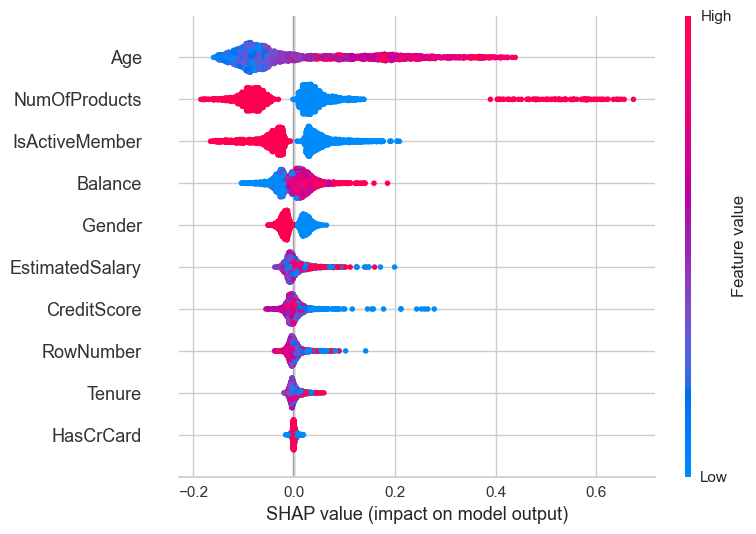

In [11]:
interpret_model(tuned_rf)

## Step4: Deployment
pycaret is integrable with different platforms. In this case, we deployed this classification model to MLFLOW. 

## Save model()

In [12]:
save_model(gbc_model, 'gbc_model')
save_model(rf_model, 'rf_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['RowNumber', 'CreditScore', 'Age',
                                              'Tenure', 'Balance',
                                              'NumOfProducts', 'HasCrCard',
                                              'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated')...
                  RandomFor